## Understanding lineal, quadratic, cubic... regressions

In [72]:
library(ggplot2)
library(AICcmodavg)#AIC model comp

In [73]:
#effect of working ours on happiness score
#data from https://www.statology.org/quadratic-regression-r/
data.df <- data.frame(hours=c(6, 9, 12, 14, 30, 35, 50, 57, 100, 126, 180),
              happiness=c(14, 28, 40, 43, 50, 54, 60, 55, 39, 14, 11))

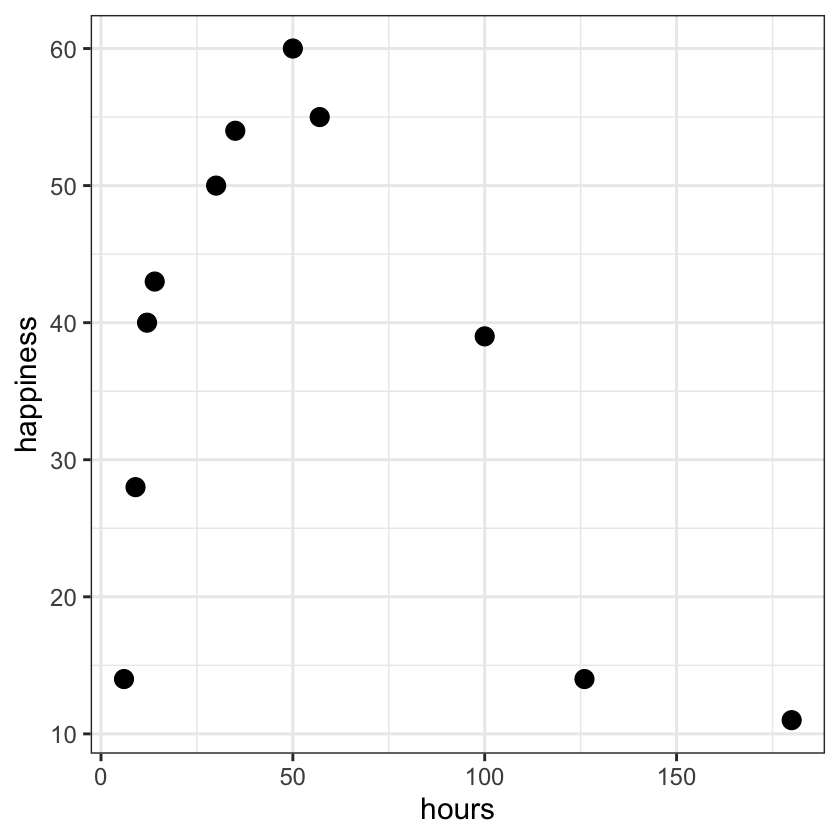

In [74]:
my.figure<-ggplot(data.df,aes(hours,happiness))+
  geom_point(size=5,shape=19)+
  theme_bw(base_size = 18)
my.figure

`geom_smooth()` using formula 'y ~ x'



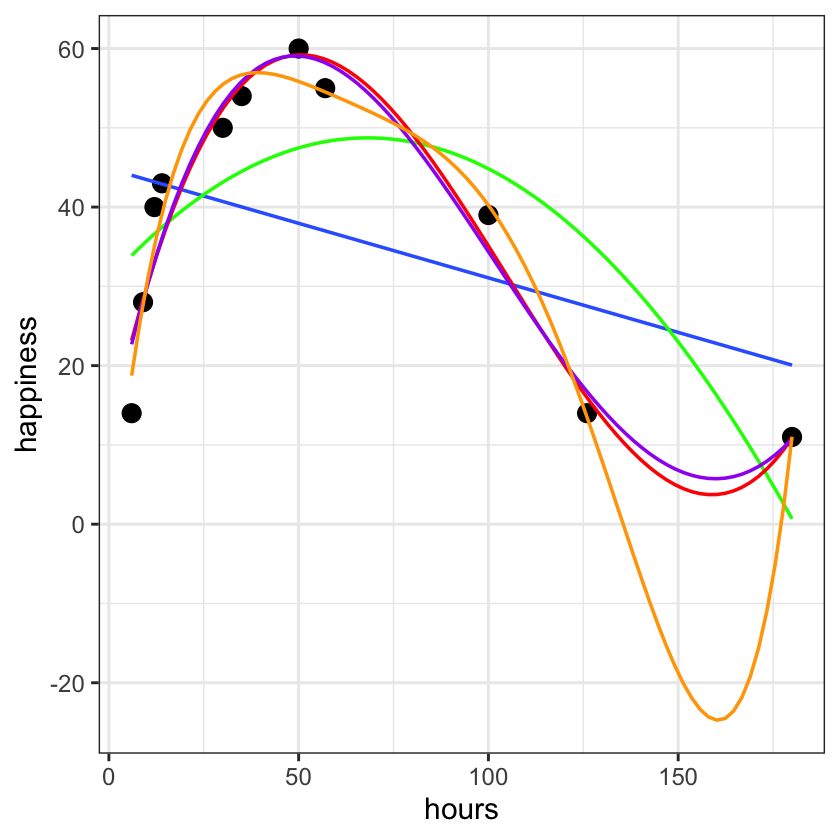

In [75]:
my.figure+
  stat_smooth(method = "lm",se=F)+
  stat_smooth(method = "lm", formula = y ~ x + I(x^2),se=F, 
              col="green")+
  stat_smooth(method = "lm", formula = y ~ x + I(x^2)+ I(x^3),se=F,
              col="red")+
  stat_smooth(method = "lm", formula = y ~ poly(x,4),se=F,
              col="purple")+
  stat_smooth(method = "lm", formula = y ~ poly(x,5),se=F,
              col="orange")

In [76]:
lineal.model<-lm(happiness~hours,data.df)
quadratic.model<-lm(happiness~hours+I(hours^2),data.df)
cubic.model<-lm(happiness~hours+I(hours^2)+I(hours^3),data.df)
IVdegree.m<-lm(happiness~poly(hours,degree=4),data.df)
Vdegree.m<-lm(happiness~poly(hours,degree=5),data.df)

In [77]:
coefficients(lineal.model)

(Intercept)       hours 
 44.8342937  -0.1376046

So the lineal model explaining happyness on the basis on working hr is:

$${
    happiness=44.83 - 0.13hours
}$$

In [78]:
coefficients(quadratic.model)

(Intercept)        hours   I(hours^2) 
30.880820818  0.523778034 -0.003842053

and the cuadratic model explaining happyness on the basis on working hr is:

$${
happiness=30.88+0.52hours-0.0038hours^{2}
}$$

and so on for the others

comparing fit of models using AIC

In [79]:
selectionmodels<-list(lineal.model,quadratic.model,cubic.model,
                      IVdegree.m,
                      Vdegree.m)
mod.names <- c("lineal","quadratic.model","cubic.model",
               "4th degree model",
                      "5th degree model")
aictab(cand.set = selectionmodels, modnames = mod.names)

,Modnames,K,AICc,Delta_AICc,ModelLik,AICcWt,LL,Cum.Wt
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,cubic.model,5,86.41034,0.00000,1.000000e+00,9.935273e-01,-32.20517,0.9935273
4,4th degree model,6,97.30454,10.89420,4.308778e-03,4.280889e-03,-32.15227,0.9978082
2,quadratic.model,4,99.57814,13.16780,1.382446e-03,1.373498e-03,-42.45574,0.9991817
1,lineal,3,100.65061,14.24027,8.086586e-04,8.034245e-04,-45.61102,0.9999852
5,5th degree model,7,108.63378,22.22344,1.493624e-05,1.483957e-05,-28.65022,1.0000000


In [80]:
summary(cubic.model)
#Multiple R-squared:  0.9292!!!


Call:
lm(formula = happiness ~ hours + I(hours^2) + I(hours^3), data = data.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1811 -2.1856 -0.3177  2.3485  7.1189 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.149e+01  4.642e+00   2.476 0.042430 *  
hours        2.109e+00  2.819e-01   7.484 0.000139 ***
I(hours^2)  -2.748e-02  3.882e-03  -7.078 0.000197 ***
I(hours^3)   8.745e-05  1.416e-05   6.175 0.000456 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.668 on 7 degrees of freedom
Multiple R-squared:  0.9292,	Adjusted R-squared:  0.8988 
F-statistic: 30.61 on 3 and 7 DF,  p-value: 0.000214


**Observations**: Certainly a lineal model does not adjust well to the data. The cubic model (in red) is the one that best adjusts to data points, that would be the optimal model in theory, a 4 or 5th degree regression does not "bend" in a way that the line approaches to the maximum to the points (SSE: Sum of Squares of Error). However, the cubic model has probably an overfitting problem. This is, the model adjusts very well to sample data, yes, cool, but probably it wont adjust very well to make predictions on a new set of working hours, I do not like the last loop of its line either, does not look real. Therefore I would reasonably stick to the quadratic model. For istance the data below would adjust better into a quadratic model

In [82]:
more.data<-read.csv("https://raw.githubusercontent.com/norberello/working-hours-penalize-happiness/main/happywork.csv")
head(more.data,3)

,X,working_hr,hap.score
,<int>,<dbl>,<dbl>
1,1,18.61907,77.09818
2,2,109.27780,75.95934
3,3,31.09136,82.13698


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



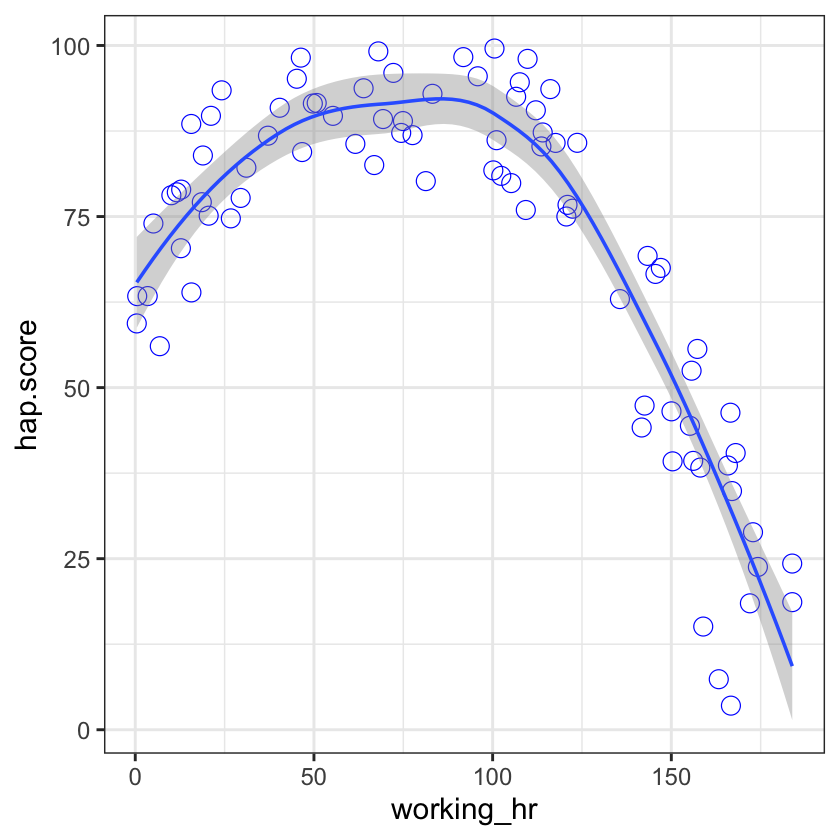

In [88]:
ggplot(more.data,aes(working_hr,hap.score))+
  geom_point(size=5,shape=1,col="blue")+
  theme_bw(base_size = 18)+geom_smooth()